In [38]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [39]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [40]:
X.shape, y.shape

((50000, 15), (50000,))

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [42]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [43]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [44]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.314605, T: 37500, Avg. loss: 0.455801
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.469578, T: 75000, Avg. loss: 0.394737
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580452, T: 112500, Avg. loss: 0.385561
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.660824, T: 150000, Avg. loss: 0.382161
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.717218, T: 187500, Avg. loss: 0.380474
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 15, Bias: -0.761816, T: 225000, Avg. loss: 0.379481
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.793932, T: 262500, Avg. loss: 0.379096
Total training time: 0.09 seconds.
-- Epoch 8
Norm: 1.07, NNZs: 15, Bias: -0.820446, T: 300000, Avg. loss: 0.378826
Total training time: 0.11 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.840093, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [45]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42328902,  0.18380407, -0.14437354,  0.34064016, -0.21316099,
          0.56702655, -0.44910569, -0.09094413,  0.21219292,  0.17750247,
          0.19931732, -0.00506998, -0.07781235,  0.33343476,  0.0320374 ]]),
 (1, 15),
 array([-0.85032916]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

In [46]:
def sigmoid_function(w, x, b):
    yp=np.dot(x,w.T)+b
    return 1.0 / (1 + np.exp(-yp))

In [47]:
def log_loss(w,x,y,b):
    sigmoid_val =  sigmoid_function(w, x, b) 
    l_loss_1 = y * np.log10(sigmoid_val)
    l_loss_2 = (1 - y) * np.log10(1 - sigmoid_val) 
    sum_log = -l_loss_1 - l_loss_2
    return np.mean(sum_log)

In [54]:
def sgd_Logistic_Regression(X_train, y_train, X_test, y_test, n_epochs,w,b):
    
    inilogloss_Train=[]
    inilogloss_Test=[]
    trlerror=0
    eta0  = 0.0001
    alpha = 0.0001
    
    for i in range(len(X_train)):
        Xi=X_train[i,:].reshape(1,X_train.shape[1])
        yi=y_train[i]

        trlerror = np.sum(log_loss(w, b, Xi, yi))
        inilogloss_Train.append(trlerror)

    telerror=0
    for i in range(len(X_test)):
        Xi=X_train[i,:].reshape(1,X_test.shape[1])
        yi=y_test[i]

        telerror = np.sum(log_loss(w, b, Xi, yi))
        inilogloss_Test.append(telerror)

    logloss_Train=[]
    logloss_Test=[]
    N=len(X_train)
    
    for epoch in range(0,n_epochs):
       
        for i in range(0,N):
            Xi=X_train[i]
            yi=y_train[i]
                        
            w = ((1- eta0 * (alpha / N)) * w)+((eta0 * Xi)*(yi - sigmoid_function(w,Xi,b)))
            b = b + (eta0 * (yi-sigmoid_function(w,Xi,b)))
        
        train_loss = log_loss (w,X_train, y_train,b)
        logloss_Train.append(train_loss)
        
        test_loss = log_loss (w, X_test, y_test,b)
        logloss_Test.append(test_loss)
        
        print("Epoch: %d, Loss: %.3f, bias: %.3f" %(epoch+1, train_loss, b))
        
    # Plot train and test error in each iteration
    plt.figure()
    plt.plot(np.array(logloss_Train), label='Train LogLoss')
    plt.plot(np.array(logloss_Test), label='Test LogLoss')
    plt.title("SGD Log Loss per iteration")
    plt.xlabel("Number of iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    return w, b

Epoch: 1, Loss: 0.175, bias: -0.315
Epoch: 2, Loss: 0.169, bias: -0.471
Epoch: 3, Loss: 0.166, bias: -0.580
Epoch: 4, Loss: 0.165, bias: -0.659
Epoch: 5, Loss: 0.165, bias: -0.718
Epoch: 6, Loss: 0.165, bias: -0.761
Epoch: 7, Loss: 0.164, bias: -0.794
Epoch: 8, Loss: 0.164, bias: -0.818
Epoch: 9, Loss: 0.164, bias: -0.836
Epoch: 10, Loss: 0.164, bias: -0.850


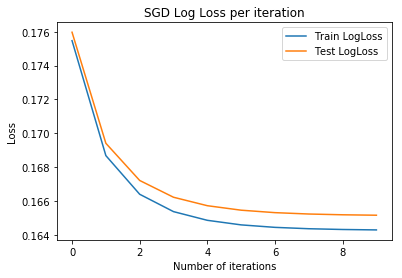

In [55]:
w = np.zeros_like(X_train[0])
b = 0
n_epochs=10
#lr_rate=0.01
w_optimal, b_optimal = sgd_Logistic_Regression(X_train, y_train, X_test, y_test, n_epochs,w,b)

In [56]:
w_optimal, w_optimal.shape, b_optimal

(array([-0.42315311,  0.19095979, -0.14588118,  0.33814991, -0.21196623,
         0.56525978, -0.44538357, -0.09171679,  0.21795314,  0.16977398,
         0.19522044,  0.00229554, -0.07781461,  0.33882618,  0.02214234]),
 (15,),
 -0.8500967712837224)

In [57]:
w_optimal-clf.coef_ , b_optimal - clf.intercept_

(array([[ 1.35900952e-04,  7.15571232e-03, -1.50763339e-03,
         -2.49025652e-03,  1.19475700e-03, -1.76677191e-03,
          3.72212016e-03, -7.72661070e-04,  5.76022055e-03,
         -7.72849132e-03, -4.09687898e-03,  7.36552366e-03,
         -2.26067009e-06,  5.39142208e-03, -9.89505735e-03]]),
 array([0.00023239]))

Observation : I compared my implementation and SGDClassifier's the weights and intercept and the difference of w_optimal
    (my implementation) and clf.coef_ is exactly same as per the instructions givens

In [58]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid_function(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

In [59]:
print(1-np.sum(y_train - pred(w_optimal,b_optimal,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w_optimal,b_optimal,X_test))/len(X_test))

0.95536
0.95296
